In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

In [2]:
from grb_afterglow_sim.spectrum import fireball_afterglow as grb

In [3]:
import grb_afterglow_sim.constants as cc

In [4]:
from gft_etc.photometry import *
from gft_etc.utils import *

In [47]:
redshift = 0.1
n0 = 1
eps_b = 1e-4
eps_e = 0.1
E_iso = 1e53
eta=0.15
p=2.2  #>2
Y=0
ism_type=0

In [48]:
300/86400

0.003472222222222222

In [49]:
g_eff=4819
g_width=500
r_eff=6201
r_width=500
i_eff=7537
i_width=500
z_eff=8658
z_width=500
J_eff=12509
J_width=1000
H_eff=16345
H_width=2000


In [50]:
#time = np.logspace(-5,7,1e4) # in days
td= 300/86400 #days
DIT=300  #s
time=np.linspace(td,td+DIT/86400,20)

wavelength = np.linspace(3000,100000,1000) #in angstroms
frequencies = 3e8 / (wavelength*1e-10)

#Load object
afterglow=grb(n0=n0,eps_b=eps_b,eps_e=eps_e,E_iso=E_iso,eta=eta,p=p,Y=Y,z=redshift,ism_type=ism_type,disp=0)
#Compute light curve for each time
afterglow_lc=afterglow.light_curve(time,frequencies)


sed_stacked=np.zeros(len(wavelength))
#sed_stacked2=np.zeros(len(info_dict['wavelength_ang']))
for i in range(len(wavelength)):
    sed_stacked[i]=np.trapz(afterglow_lc[:,i],time)

grb_fJy = sed_stacked*1e-3 /(DIT/86400.)

<IPython.core.display.Javascript object>


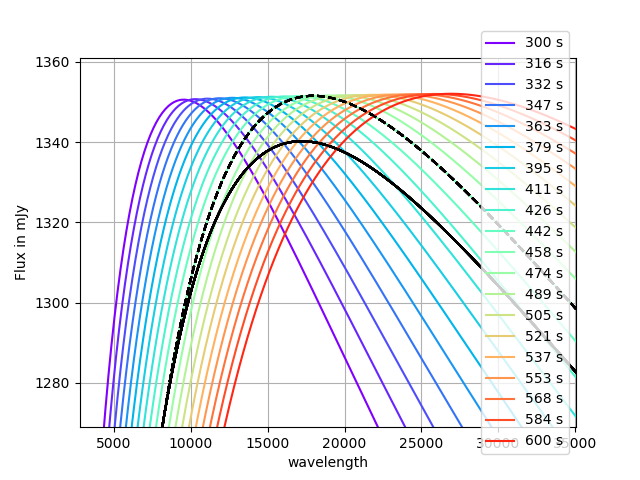

/home/dcorre/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:12: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [51]:
#Plot afterglow SED
plt.figure()

# Set color for plots
cmap = plt.get_cmap('rainbow')
colors = [cmap(i) for i in np.linspace(0, 1, len(time)+1)]

#for i,wvl in enumerate(wavelength):
#    plt.plot(time*86400,afterglow_lc[:,i])#,label=labels[i],color=colors[i])
for i,t in enumerate(time):
    plt.plot(wavelength,afterglow_lc[i,:],label='%.0f s' % (t*86400),color=colors[i])
    plt.plot(wavelength,afterglow_lc[np.rint(len(time)/2),:],color='black',ls='--')
    plt.plot(wavelength,grb_fJy*1e3,color='black')
    
#plt.xscale('log')
#plt.yscale('log')
#plt.ylim(1e-6,10)
plt.xlim(1000,1.3*wavelength[-1])
plt.xlabel(r'wavelength') 
plt.ylabel(r'Flux in mJy')
plt.grid(True)
plt.legend(loc='right')

In [98]:
A_tel=np.pi*((1.3/2)**2 - (0.58/2)**2)*1e4
trans_sys=0.429
trans_atm=0.776

info_dict=dict(Flux_zero_Jy=3631)

flam = fJy_to_flambda(wavelength, grb_fJy)
fph = flambda_to_fph(wavelength, flam)    # ph/s/cm2/A
F_e_s = np.trapz(fph*trans_sys*trans_atm,wavelength) * A_tel
#mag=Jy2Mag(info_dict,flambda_to_fJy(wavelength, flam))
ZP=24
mag=-2.5*np.log10(F_e_s)+ZP

In [117]:
#band integration
ZP_g=24.36
mask= (wavelength>g_eff-g_width/2) & (wavelength<g_eff+g_width/2)
g_flam=fJy_to_flambda(wavelength[mask], grb_fJy[mask])
g_fph=flambda_to_fph(wavelength[mask], g_flam)
F_e_s = np.trapz(g_fph*trans_sys*trans_atm,wavelength[mask]) * A_tel
g_mag=-2.5*np.log10(F_e_s)+ZP_g
print (F_e_s, g_mag,mag2Jy(info_dict,g_mag)*1e3)

150852.665186 11.4136175313 98.7595804687


In [118]:
mean_gband_mJY=flambda_to_fJy(g_eff,g_band/g_width)*1e3
print (mean_gband_mJY)

0.169146711942


In [119]:
mag2=-2.5*np.log10(np.trapz(g_flam,wavelength[mask])) +2.5*np.log10(np.trapz(fJy_to_flambda(wavelength[mask],3631*np.ones(len(wavelength[mask]))),wavelength[mask]))

In [120]:
mag2

10.261181881561814

In [121]:
np.mean(grb_fJy[mask]), mag2Jy(info_dict,mag2)

(0.28558001947370637, 0.28546541277282333)

In [122]:
from gft_etc.etc import etc

In [109]:
b=etc(configFile='/home/dcorre/code/etc_is/gft-sim/grb_afterglow_sim/notebooks/input_vis')

In [110]:
b.sim()


Information about Passband:
----------------------------
Cut_on: 4135 angstroms
Effective wavelength: 4819 angstroms
Cut_off: 5515 angstroms

Airmass: 1.50

Seeing: 1.01

MEAN EFFICENCIES:
------------------
Obscuration: 0.801
Telescope: 0.581 (+obs: 0.466)
Instrument: 0.738
Optics (tel+inst): 0.429  (+obs: 0.343)
Filter: 0.950
Atmosphere: 0.776
Camera: 0.898
System: 0.429 (+obs: 0.343)

Telescope alan: 0.747
Instrument alan: 0.574
System alan (+atm) (+obs+atm): 0.429 (0.332) (0.266)
Zeropoint: 24.36 (AB mag)


A magnitude (AB system) of 10.26 in g_85 band within a total exposure time of 300.00 seconds splited in 1 exposure(s), implies a total SNR of :

	 - Integrated SNR over 13 pixels: 9687.07


A magnitude (AB system) of 10.26 in g_85 band within a total exposure time of 300.00 seconds splited in 1 exposure(s), implies a SNR for the central pixel of of :


	 - SNR of the central pixel: 3190.26 



Full well capacity of 1 pixel: 350000.00 (electrons)
Inverse gain of 1.50 e/ADU and 1

/home/dcorre/.local/lib/python3.5/site-packages/numpy/core/_methods.py:32: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return umr_sum(a, axis, dtype, out, keepdims)


In [111]:
mag2Jy(info_dict,b.information['mag'])

0.28512777298685887